Sintering Trajectories: Description on How Density, Surface Area, and Grain Size Change

G =  Current Average Grain Size  
G_o = Average Initial Grain Size    
Ep = Fractional Porosity (1-f)    
Theta = starting grain size and porosity condition  
Alpha =  diffusivity and surface energy  
t = time  
f = Current Fractional Density    
fo = Original Fractional Density  
N = coefficient often near 1/6 - 1/3  
K = temperature dependent rate parameter  
Y = Change in Length / Original Length   
Css = Contiguity (Grain Boundary/Total Grain Perimeter)  
Kss = grain growth rate parameter solid-solid interface  
Ksv = grain growth rate parameter solid-vapor interface  
q = factor (1.5)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from sklearn.metrics import r2_score

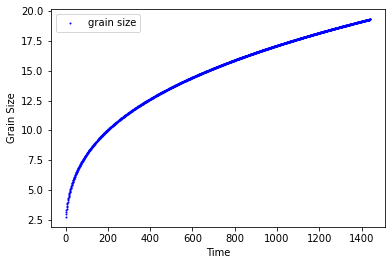

In [7]:
# density definitions
# density will climb from 0.64 to ideally 1 (but always slightly less) (somewhere between 0.85 and 1)
# we will take density from 0.64 to 0.95 (1000 points in between)
# we can add in some gaussian noise here as GN



t = np.arange(1, 1441, dtype=np.float64)

G_original = 2.5

K = 5

G = ((G_original**3)+K*t)**(1/3)


#Plot density with GN vs true density

plt.plot(t, G, 'bo', label="grain size", markersize=1)
plt.xlabel('Time')
plt.ylabel('Grain Size')
plt.legend()
plt.show()

In [20]:
t2 = t[1],t[1439]
t3 = t[1], t[720], t[1439]
t4 = t[1], t[480], t[960], t[1439]
t5 = t[1], t[360], t[720], t[1080], t[1439]
t6 = t[1], t[288], t[576], t[864], t[1152], t[1439]
t7 = t[1], t[240], t[480], t[720], t[960], t[1200], t[1439]
t8 = t[1], t[205], t[410], t[615], t[820], t[1025], t[1230], t[1439]

mu = 0

sigma = 0.01

MP = 400

GN = np.random.normal(mu, sigma, MP)

In [21]:
G_F = np.zeros((1440,400))
G_F.shape

(1440, 400)

In [23]:
G_F = np.zeros((1440,400))

for i in range(1440):
    mu = 0
    sigma = 1
    MP = 400
    GN = np.random.normal(mu, sigma, MP)
    G_F[i] = G[i]+GN

    

In [24]:
tt = np.expand_dims(t, axis=1)

In [25]:
K_measured = (G_F**3 - G_F[0]**3)/tt

In [26]:
G2 = np.array([G_F[1],G_F[1439]])
G3 = np.array([G_F[1], G_F[720], G_F[1439]])
G4 = np.array([G_F[1], G_F[480], G_F[960], G_F[1439]])
G5 = np.array([G_F[1], G_F[360], G_F[720], G_F[1080], G_F[1439]])
G6 = np.array([G_F[1], G_F[288], G_F[576], G_F[864], G_F[1152], G_F[1439]])
G7 = np.array([G_F[1], G_F[240], G_F[480], G_F[720], G_F[960], G_F[1200], G_F[1439]])
G8 = np.array([G_F[1], G_F[205], G_F[410], G_F[615], G_F[820], G_F[1025], G_F[1230], G_F[1439]])
G2.shape

(2, 400)

In [27]:
K_measured[1]

array([ 3.82981462e+00,  3.07959977e+00,  5.90925869e-02,  2.01004637e+00,
        1.65528256e-01,  2.57770522e+00,  1.67093034e+00,  4.32249210e-01,
        2.96120200e-01,  1.70188480e+00,  1.17147489e+00,  4.44066969e-01,
        1.59617989e+00,  5.04253124e+00,  3.35700258e+00,  4.13630874e+00,
        3.21649230e+00,  3.76125798e+00,  7.85169119e-01,  3.32484472e+00,
        2.93078945e+00,  3.60747736e-01,  3.23100904e+00,  3.04986489e+00,
        2.18633738e+00,  5.12624275e+00,  8.15935123e-01,  1.00623635e+00,
        2.63091806e+00,  4.47267939e+00,  5.49490139e-01,  9.60160777e-01,
        2.20980917e+00,  6.43832251e+00,  4.93063171e+00,  1.59708775e+00,
        2.61005911e+00,  2.38185338e+00, -3.58366159e+00,  4.74061625e+00,
        1.73862637e+00,  4.58383658e-01,  1.54035287e+00,  4.80048938e+00,
        3.45619854e+00, -5.49162198e-02,  4.57420881e-01,  3.27341317e+00,
        2.08084423e+00,  2.82436495e+00,  6.19516436e+00,  5.83783028e-01,
        3.17334113e+00,  

In [55]:
K2 = np.array([K_measured[1439]])
K3 = np.array([K_measured[720], K_measured[1439]])
K4 = np.array([K_measured[480], K_measured[960], K_measured[1439]])
K5 = np.array([K_measured[360], K_measured[720], K_measured[1080], K_measured[1439]])
K6 = np.array([K_measured[288], K_measured[576], K_measured[864], K_measured[1152], K_measured[1439]])
K7 = np.array([K_measured[240], K_measured[480], K_measured[720], K_measured[960], K_measured[1200], K_measured[1439]])
K8 = np.array([K_measured[205], K_measured[410], K_measured[615], K_measured[820], K_measured[1025], K_measured[1230], K_measured[1439]])


x = random.randint(400, size=(1))

In [56]:
K2M = K2[:, x]
K3M = K3[:, x]
K4M = K4[:, x]
K5M = K5[:, x]
K6M = K6[:, x]
K7M = K7[:, x]
K8M = K8[:, x]


In [57]:
KA2 = np.average(K2M)
KA3 = np.average(K3M)
KA4 = np.average(K4M)
KA5 = np.average(K5M)
KA6 = np.average(K6M)
KA7 = np.average(K7M)
KA8 = np.average(K8M)

In [59]:
print(KA8)

4.978079627040562


In [ ]:
G2 = np.array(G[1],G[1439]
G3 = G[1], G[720], G[1439]
G4 = G[1], G[480], G[960], G[1439]
G5 = G[1], G[360], G[720], G[1080], G[1439]
G6 = G[1], G[288], G[576], G[864], G[1152], G[1439]
G7 = G[1], G[240], G[480], G[720], G[960], G[1200], G[1439]
G8 = G[1], G[205], G[410], G[615], G[820], G[1025], G[1230], G[1439]

mu = 0

sigma = 5

MP = 400

GN1 = np.random.normal(mu, sigma, MP)
GN2 = np.random.normal(mu, sigma, MP)

In [ ]:
G2.shape

In [ ]:
K_measured = (G3**3 - G2**3)/1440

In [ ]:
G2 = G[1] + GN
G3 = G[1439] + GN

K_measured = (G3**3 - G2**3)/1440

In [ ]:
Kavg = np.average(K_measured)
Kavg

In [ ]:
# density definitions
# density will climb from 0.64 to ideally 1 (but always slightly less) (somewhere between 0.85 and 1)
# we will take density from 0.64 to 0.95 (1000 points in between)
# we can add in some gaussian noise here as GN


G2 = G

t2 = t[1,1440]

mu = 0

sigma = 0.1


MP = 20

GN = np.random.normal(mu, sigma, MP)



G_original = 2.5

G_0 = np.ones(1, dtype=np.float64)
G_0 = G_0*G_original
G_0 = G_0+GN1

K = 5

G = ((G_0**3)+K*t)**(1/3)
G = G+GN2

K_measured = (G**3 - G_0**3)/t


#Plot density with GN vs true density

plt.plot(t, G, 'bo', label="grain size", markersize=1)
plt.xlabel('Time')
plt.ylabel('Grain Size')
plt.legend()
plt.show()

G_0

In [ ]:
plt.hist(K_measured, bins = 100)
plt.show()

In [ ]:
K_error = np.abs((K_measured - K)/K)
np.average(K_error)*100

In [ ]:
K_error_final = np.zeros(100)

for i in range (3,103):
    NM = i
    x = random.randint(1000, size=(NM))
    K_error = np.abs((K_measured[x] - K)/K)
    K_error_final[NM-3] = np.average(K_error)
    

In [ ]:
nom  = np.arange(100)
K_error_final = K_error_final*100

In [ ]:
plt.plot(nom, K_error_final, 'bo', label="grain size", markersize=1)
plt.xlabel('number of measurements')
plt.ylabel('error')
plt.legend()
plt.show()

In [ ]:
theta =0.6
eps = ((theta*G_0)/G)**2
f = 1-eps

In [ ]:
plt.plot(t, f, 'bo', label="grain size", markersize=1)
plt.xlabel('Time')
plt.ylabel('Grain Size')
plt.legend()
plt.show()

In [ ]:
K

In [ ]:
# Contiguity

# q is a dimensionless parameter
# q will go from 1.4-1.7 based on the stage of sintering that part is in

q = 1.5

Css = 1 - q*np.sqrt(Ep)

In [ ]:
K2 = np.array([K_measured[1],K_measured[1439]])
K3 = np.array([K_measured[1], K_measured[720], K_measured[1439]])
K4 = np.array([K_measured[1], K_measured[480], K_measured[960], K_measured[1439]])
K5 = np.array([K_measured[1], K_measured[360], K_measured[720], K_measured[1080], K_measured[1439]])
K6 = np.array([K_measured[1], K_measured[288], K_measured[576], K_measured[864], K_measured[1152], K_measured[1439]])
K7 = np.array([K_measured[1], K_measured[240], K_measured[480], K_measured[720], K_measured[960], K_measured[1200], K_measured[1439]])
K8 = np.array([K_measured[1], K_measured[205], K_measured[410], K_measured[615], K_measured[820], K_measured[1025], K_measured[1230], K_measured[1439]])


x = random.randint(400, size=(1))

In [ ]:
# define initial grain size

G_o = np.array([10], dtype=np.float64)
Kss = np.array([20], dtype=np.float64)

t = np.arange(1000, dtype=np.float64)

In [ ]:
G = (G_o**3 + t*Kss*(1-q*Ep_True**0.5))**(1/3)


In [ ]:
G 

In [ ]:
plt.plot(t, G, 'bo', label="Density Noise", markersize=1)
plt.xlabel('TIME')
plt.ylabel('GRAIN SIZE')
plt.legend()
plt.show()

In [ ]:
plt.plot(t, F_True, 'bo', label="Density Noise", markersize=1)
plt.xlabel('TIME')
plt.ylabel('POROSITY')
plt.legend()
plt.show()

In [ ]:
t = np.arange(1000, dtype=np.float64)
K = 20
G_0 = 10

In [ ]:
G = (G_0**3+K*t)**(1/3)

In [ ]:
plt.plot(t, G, 'bo', label="Density Noise", markersize=1)
plt.xlabel('TIME')
plt.ylabel('GRAIN SIZE')
plt.legend()
plt.show()

In [ ]:
Ep = ((0.6*G_0)/G)**2

In [ ]:
plt.plot(t, Ep, 'bo', label="Density Noise", markersize=1)
plt.xlabel('TIME')
plt.ylabel('Porosity')
plt.legend()
plt.show()

In [ ]:
f = 1-Ep

plt.plot(t, f, 'bo', label="Density Noise", markersize=1)
plt.xlabel('TIME')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(t, f, G, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [ ]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.plot3D(f, G, t, 'gray')
ax.scatter3D(f, G, t, cmap='Greens');


In [ ]:

ax.scatter3D(f, G, t, cmap='Greens')